# Clase 1 - Semana 4
#### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Tendencia

In [2]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/rama_2015.csv'
df_15 = pd.read_csv(ruta, parse_dates = True, index_col=0)
df_15.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789


### Mann-Kendall test

La prueba de Mann-Kendall (MK) es una prueba no paramétrica que detecta la presencia de una tendencia monótona (creciente o decreciente) en una serie temporal sin requerir que los datos sigan una distribución específica. Se usa cuando se quiere saber si “algo cambia sistemáticamente con el tiempo”.

   * $H_0$: No hay una tendencia monótona (la serie es aleatoria).
   
   * $H_a$: Existe una tendencia monótona (positiva o negativa).

 El estadístico de prueba $(S)$ de la serie $p_1,p_2,p_3,..., p_n$ se estiman a través de la ecuación: 

\begin{equation}
S=\sum_{j=1}^{n-1}\sum_{k=j+1}^n \ sign   (p_k-p_j),
\end{equation} 


 donde $n$ representa la observación total, $p_k$ y $p_j $indica los datos observados del tiempo $k$ y $j$, donde la función $sign$ se define como:

\begin{equation}
\ sign  (p_k-p_j)= \left\{ \begin{array}{lcc}
 1 & \mbox{if} & (p_k-p_j)>0 \\ \\ 0 & \mbox{if} & (p_k-p_j)=0 \\ \\ -1 & \mbox{if} & (p_k-p_j)<0 \end{array} \right.
\end{equation}


  

La varianza de $S$ se estima de la siguiente manera:

\begin{equation}
VAR(S)=\frac{1}{18}\left[   n(n-1)(2n+5)-\sum_{j=1}^g T_j(T_j-1)(2T_j+5).  \right]
\end{equation}

Donde:

- $n$: número total de observaciones.

- $g$: número de grupos de empates (valores repetidos).

- $T_j$: número de veces que se repite el valor en el grupo $j$.


A partir de $S$ y *VAR(S)*, la medida de prueba estandarizada $Z$ se calcula utilizando la ecuación:

\begin{equation}\label{Z}
Z = \left\{ \begin{array}{lcc}
\frac{S-1}{\sqrt{VAR(S)}} & \mbox{if} & S > 0 \\ 
\\ 0 & \mbox{if} & S=0 \\ 
\\ \frac{S+1}{\sqrt{VAR(S)}} & \mbox{if} & S<0 \end{array} \right.
\end{equation}

### Regla de decisión

- Si $|Z| > Z_{\alpha/2}$, se rechaza $H_0$.
- Por ejemplo, para $\alpha = 0.05$, se rechaza $H_0$ si $|Z| > 1.96$.


### Pendiente de Sen

Si se detecta una tendencia, se puede estimar su magnitud con la pendiente de Sen:

$$
\hat{\beta} = \text{mediana} \left( \frac{x_j - x_i}{j - i} \right), \quad \text{para } j > i
$$

Esta pendiente representa el cambio por unidad de tiempo y es robusta frente a valores atípicos.


https://digital.library.unt.edu/ark:/67531/metadc1197046/m2/1/high_res_d/7037501.pdf

## Cuándo se usa

- Series de tiempo ambientales: temperatura, precipitación, calidad del aire, Evapotranspiración, etc.
- Datos hidrológicos: caudales, niveles freáticos, calidad del agua (pH, conductividad, nitratos, concentración de contaminantes, etc
- Datos ambientales: índices de calidad del aire, nivel del mar o retroceso de glaciares.
- Datos ecológicos: tamaño de poblaciones animales o vegetales a lo largo del tiempo, cambios en el uso del suelo, biodiversidad en estaciones anuales.
- Datos socioeconómicos: crecimiento poblacional, índices de pobreza o desigualdad, producción agrícola o consumo energético anual.
- Datos de series financieras (de forma limitada): Precios de commodities a largo plazo (ej. petróleo, oro), consumo energético o producción industrial.

## Cuándo es especialmente útil

- Cuando los datos no son normalmente distribuidos.
- Cuando hay valores atípicos o ruido (la prueba es robusta).
- Cuando se sospecha una tendencia monótona, pero no necesariamente lineal.
- En estudios de impacto del cambio climático o evaluación de políticas públicas a largo plazo.


In [4]:
import pymannkendall as mk

####  Resultado de `mk.original_test()`

Al ejecutar `mk.original_test(x, alpha=0.05)`, se obtiene un objeto con los siguientes campos:

| Atributo     | Descripción |
|--------------|-------------|
| `trend`      | Tendencia detectada: puede ser `'increasing'`, `'decreasing'` o `'no trend'`. Indica si hay una tendencia monótona en la serie. |
| `h`          | Resultado de la hipótesis: `True` si se **rechaza** la hipótesis nula $H_0$ (es decir, **hay una tendencia significativa**), `False` en caso contrario. |
| `p`          | Valor-$p$ asociado al estadístico $Z$. Si $p < \alpha$, se rechaza $H_0$ y se concluye que existe una tendencia significativa. |
| `z`          | Estadístico $Z$ estandarizado (normal) obtenido a partir del estadístico $S$ y su varianza. Se usa para calcular el valor-$p$. |
| `Tau`        | Coeficiente Tau de Kendall: mide la fuerza de la asociación monótona entre las observaciones. Su valor está en el rango $[-1, 1]$. |
| `s`          | Estadístico $S$, que cuenta el número de pares concordantes menos discordantes. |
| `var_s`      | Varianza de $S$. Se calcula considerando empates si los hay. |
| `slope`      | Pendiente de Sen ($\hat{\beta}$): representa la magnitud del cambio por unidad de tiempo. Es la mediana de todas las pendientes entre pares de puntos. |
| `intercept`  | Intersección con el eje $y$ de la línea de tendencia basada en la pendiente de Sen. Es decir, si la tendencia es lineal, la recta es: $y = \hat{\beta} \cdot t + \text{intercept}$. |



In [5]:
resultado = mk.original_test(df_15['PM10'], alpha = 0.05)
resultado

Mann_Kendall_Test(trend='decreasing', h=True, p=0.012908845896614007, z=-2.486274203194176, Tau=-0.08718952280596116, s=-5792.0, var_s=5425116.666666667, slope=-0.02072633401418798, intercept=45.04943944450191)

In [7]:
df_15.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2'], dtype='object')

In [6]:
for val in resultado: print(val)

decreasing
True
0.012908845896614007
-2.486274203194176
-0.08718952280596116
-5792.0
5425116.666666667
-0.02072633401418798
45.04943944450191


In [9]:
for val in df_15.columns:
    resultado = mk.original_test(df_15[val], alpha = 0.05)
    print(val)
    for val_1 in resultado: print(val_1)
    print('\n')

CO
no trend
False
0.5817462777408493
0.5508357455876581
0.01932861658889056
1284.0
5425116.666666667
6.247824481807817e-05
0.6844165052306556


NO
no trend
False
0.7957212659815356
0.2588885070844566
0.009092277585428271
604.0
5425116.666666667
0.0012858925479734154
16.806508096809377


NO2
no trend
False
0.5793937916242409
0.5542704189818134
0.019449044106578352
1292.0
5425116.666666667
0.0020411195118570746
25.011727927674126


NOX
no trend
False
0.8050110399399659
0.246867150204913
0.008670781273521
576.0
5425116.666666667
0.0020127440321533133
42.052811020930704


O3
decreasing
True
8.206697881463221e-05
-3.9382823805733342
-0.13810025590847508
-9174.0
5425116.666666667
-0.017067828597011815
30.719580098773797


PM10
decreasing
True
0.012908845896614007
-2.486274203194176
-0.08718952280596116
-5792.0
5425116.666666667
-0.02072633401418798
45.04943944450191


PM25
no trend
False
0.24865561519056523
-1.1536209262619153
-0.040463645943097995
-2688.0
5425116.666666667
-0.00546983735323

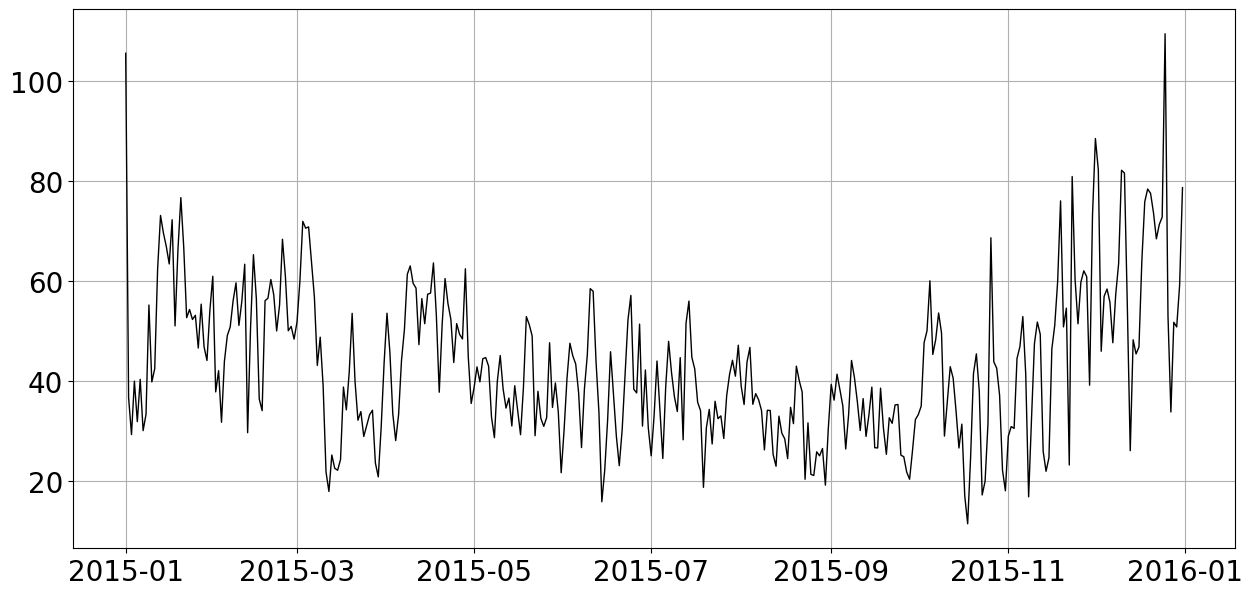

In [11]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df_15['PM10'],lw=1, color='black')
plt.tick_params(labelsize=20)
plt.grid(True)

In [12]:
slope = mk.original_test(df_15['PM10'], alpha = 0.05).slope
intercept = mk.original_test(df_15['PM10'], alpha = 0.05).intercept

In [14]:
linea = []
for i in range(0, len(df_15)):
    linea.append(slope*i+intercept)

In [16]:
linea = pd.DataFrame(linea,index = df_15.index)

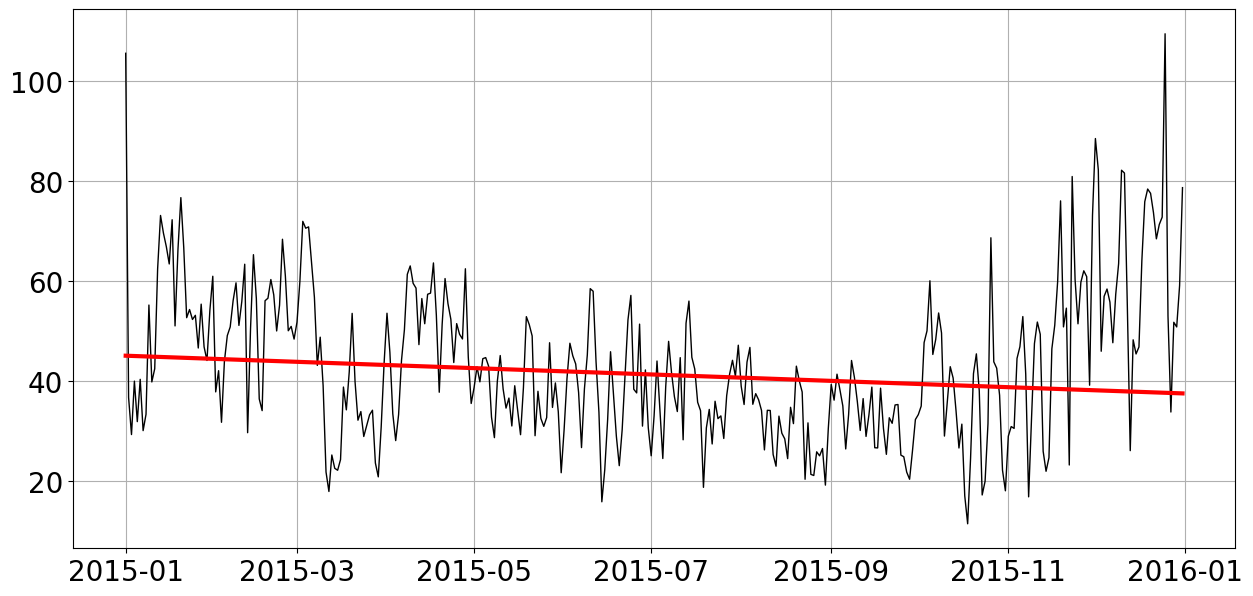

In [17]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df_15["PM10"],lw=1, color='black')
plt.plot(linea,lw=3, color='red')
plt.tick_params(labelsize=20)
plt.grid(True)

### ¿Cúal fue la tendencia de 2020 a 2023?

In [18]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/rama_2020.csv'
df_20 = pd.read_csv(ruta, parse_dates = True, index_col=0)

ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/rama_2021.csv'
df_21 = pd.read_csv(ruta, parse_dates = True, index_col=0)

ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/rama_2022.csv'
df_22 = pd.read_csv(ruta, parse_dates = True, index_col=0)

ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/rama_2023.csv'
df_23 = pd.read_csv(ruta, parse_dates = True, index_col=0)

In [19]:
df = pd.concat([df_20,df_21,df_22,df_23],axis=0)

In [21]:
df

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2020-01-01,0.428817,9.031579,13.382716,22.637895,18.774803,61.312903,26.716475,2.047619
2020-01-02,0.179193,4.286374,8.154297,12.235566,17.941581,26.385827,5.731481,0.942748
2020-01-03,0.306560,13.092157,21.731023,35.358824,24.060172,37.513944,11.231092,1.107143
2020-01-04,0.350833,11.978131,25.974958,38.288270,25.286115,52.280000,29.207951,7.677885
2020-01-05,0.427045,11.007952,29.782972,40.908549,30.433094,39.737609,21.806647,11.798077
...,...,...,...,...,...,...,...,...
2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588


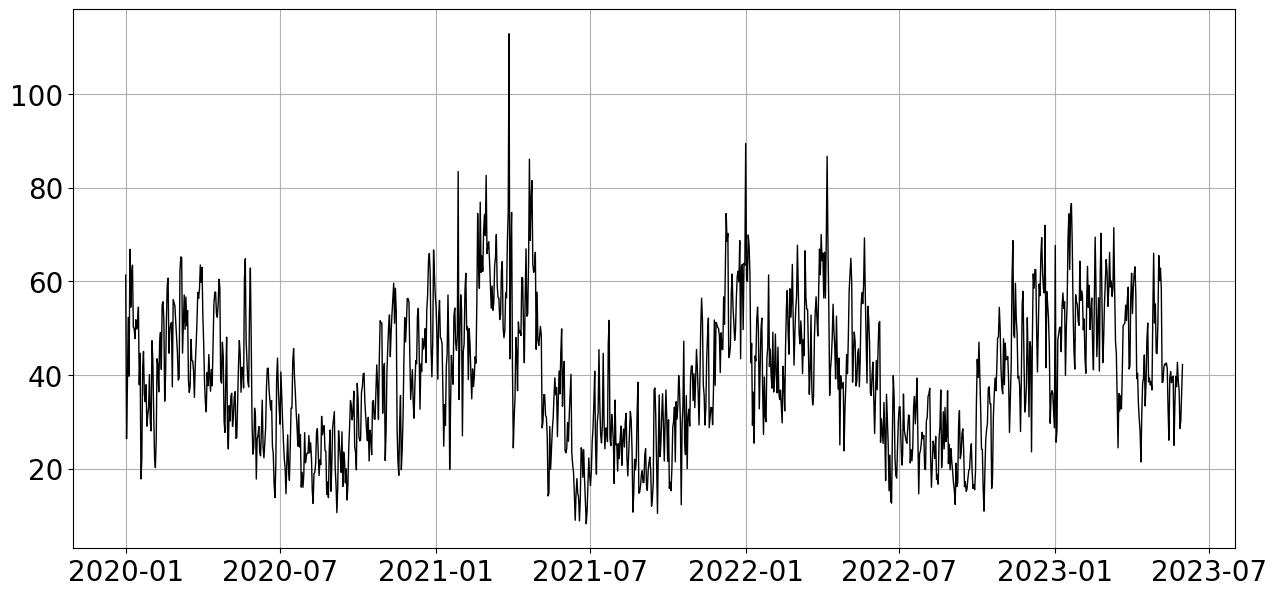

In [23]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df["PM10"],lw=1, color='black')
plt.tick_params(labelsize=20)
plt.grid(True)

In [24]:
for val in df.columns:
    resultado = mk.original_test(df[val], alpha = 0.05)
    print(val)
    for val_1 in resultado: print(val_1)
    print('\n')

CO
increasing
True
0.0
11.162982537389231
0.21104133065424435
163954.0
215713956.66666666
0.00010859993276843735
0.29448769643071804


NO
increasing
True
3.577604879012597e-11
6.620593056880137
0.12516588769708617
97239.0
215713957.66666666
0.0033155730400020373
8.698442939898955


NO2
increasing
True
2.220446049250313e-16
8.219399797729825
0.15539188112465102
120721.0
215713955.66666666
0.003746181807094772
17.878128734179956


NOX
increasing
True
4.596323321948148e-14
7.542960607031686
0.14260356476731958
110786.0
215713956.66666666
0.007245417198841384
27.21820670174999


O3
no trend
False
0.4805763230288058
0.705375923705529
0.013336662886593957
10361.0
215713957.66666666
0.0005014150362987589
30.298729543496982


PM10
increasing
True
0.0007086436949528263
3.386212952661272
0.0640188136921871
49735.0
215713957.66666666
0.004152539098397998
36.330878589459246


PM25
increasing
True
0.01200550173515924
2.511982572377768
0.047491185908781396
36895.0
215713955.66666666
0.00142473873296

# Innovative Trend Analysis (ITA)

La **Innovative Trend Analysis (ITA)** es un método gráfico propuesto por Şen (2012) para detectar tendencias en series temporales sin asumir distribución, independencia o estacionaridad. Es especialmente útil para identificar cambios de tendencia locales o no lineales.

## Paso a paso del método

1. Dividir la serie temporal $x$ en dos mitades:
   - Pasado: $x_1 = [x_0, \dots, x_{n/2-1}]$
   - Presente: $x_2 = [x_{n/2}, \dots, x_{n-1}]$
2. Ordenar cada mitad ascendentemente (sin reordenar índices originales):
   - $x_1^* = \mathrm{sort}(x_1)$
   - $x_2^* = \mathrm{sort}(x_2)$
3. Graficar los pares $(x_1^*, x_2^*)$ en un diagrama de dispersión.
4. Añadir la línea de referencia 1:1 (diagonal) como referencia para ausencia de tendencia.

## Interpretación gráfica

- Puntos por encima de la diagonal: señal de tendencia creciente.
- Puntos por debajo: tendencia decreciente.
- Puntos dispersos simétricamente: sin tendencia global.
- Patrones específicos (como dispersión en extremos) pueden indicar tendencias parciales.


Sen Z. 2012.  Innovative trend analysis methodology, J Hydrol Eng, 17 (9), pp. 1042–1046. https://doi.org/10.1061/(ASCE)HE.1943-5584.0000556

In [25]:
df_15['PM10']

fecha
2015-01-01    105.573684
2015-01-02     36.687845
2015-01-03     29.269022
2015-01-04     39.961538
2015-01-05     31.855643
                 ...    
2015-12-27     33.779817
2015-12-28     51.736973
2015-12-29     50.809013
2015-12-30     59.109474
2015-12-31     78.684100
Name: PM10, Length: 365, dtype: float64

In [29]:
int(len(df_15)/2)

182

In [30]:
p1 = df_15["PM10"].iloc[0:int(len(df_15)/2)]

In [32]:
p2 = df_15["PM10"].iloc[int(len(df_15)/2):2*int(len(df_15)/2)]

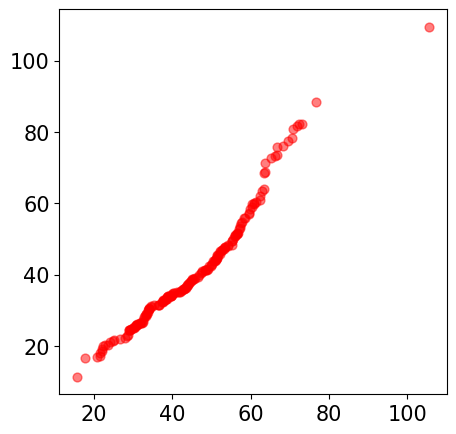

In [35]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='red',alpha=0.5)
plt.tick_params(labelsize=15)


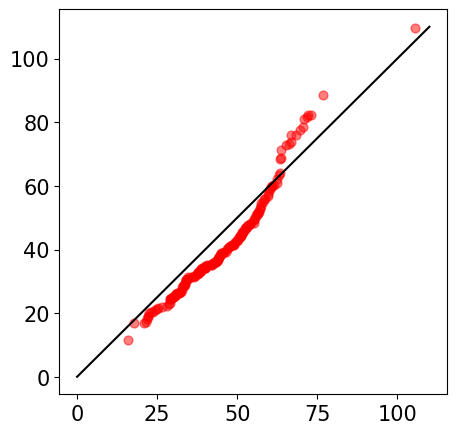

In [36]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='red', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 110
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.show()